In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('datas/output_time.csv', delimiter='§')
df

/var/folders/k4/3wvynk0s6w76yt8_h3y_s3jr0000gn/T/ipykernel_90932/63187673.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('datas/output_time.csv', delimiter='§')


,model,max_new_tokens,raw,inputs,output,trimmed_output,scores,time_taken
0,meta-llama/Llama-3.2-1B,100,Caught red handed by the pedestrian’s roadbloc...,"you are an english teacher, expert in rewritin...","['you are an english teacher, expert in rewrit...","['1. It was too cold for September, and I didn...","{""rouge1_fmeasure"": 0.6244344115257263, ""rouge...",3.414945
1,meta-llama/Llama-3.2-1B,100,If there were any suggestions of Mendelssohn i...,"you are an english teacher, expert in rewritin...","['you are an english teacher, expert in rewrit...","['10 years ago, my teacher told me the most im...","{""rouge1_fmeasure"": 0.20183485746383667, ""roug...",3.088856
2,meta-llama/Llama-3.2-1B,100,Deep Tissue Massage is a form of bodywork that...,"you are an english teacher, expert in rewritin...","[""you are an english teacher, expert in rewrit...","[""1. The work is so bad that the workers will ...","{""rouge1_fmeasure"": 0.19718310236930847, ""roug...",1.329591
3,meta-llama/Llama-3.2-1B,100,The procedure for constructing your resume and...,"you are an english teacher, expert in rewritin...","['you are an english teacher, expert in rewrit...",['1. A rewrite of the text is given. The follo...,"{""rouge1_fmeasure"": 0.31192660331726074, ""roug...",3.392573
4,meta-llama/Llama-3.2-1B,100,A. Action of the Board: The Board upon a findi...,"you are an english teacher, expert in rewritin...","['you are an english teacher, expert in rewrit...",['1. A. The Board upon a finding by a majority...,"{""rouge1_fmeasure"": 0.6612903475761414, ""rouge...",3.342113
...,...,...,...,...,...,...,...,...
995,meta-llama/Llama-3.2-1B,500,This authority is used when the House consider...,"you are an english teacher, expert in rewritin...","[""you are an english teacher, expert in rewrit...","['1. In English, the use of an auxiliary verb ...","{""rouge1_fmeasure"": 0.20983606576919556, ""roug...",8.129462
996,meta-llama/Llama-3.2-1B,500,"The agent, attorney, or other representative o...","you are an english teacher, expert in rewritin...","['you are an english teacher, expert in rewrit...",['1. make a revision or revision of. 2. give a...,"{""rouge1_fmeasure"": 0.19200000166893005, ""roug...",1.855669
997,meta-llama/Llama-3.2-1B,500,"In the 116th Congress, the Bipartisan American...","you are an english teacher, expert in rewritin...","['you are an english teacher, expert in rewrit...","['1) in the 116th Congress, the Bipartisan Ame...","{""rouge1_fmeasure"": 0.655339777469635, ""rouge1...",12.677441
998,meta-llama/Llama-3.2-1B,500,Aid from reimbursement duties under federal st...,"you are an english teacher, expert in rewritin...","['you are an english teacher, expert in rewrit...",['1. to change or modify (something) in a mann...,"{""rouge1_fmeasure"": 0.04435483738780022, ""roug...",16.700736


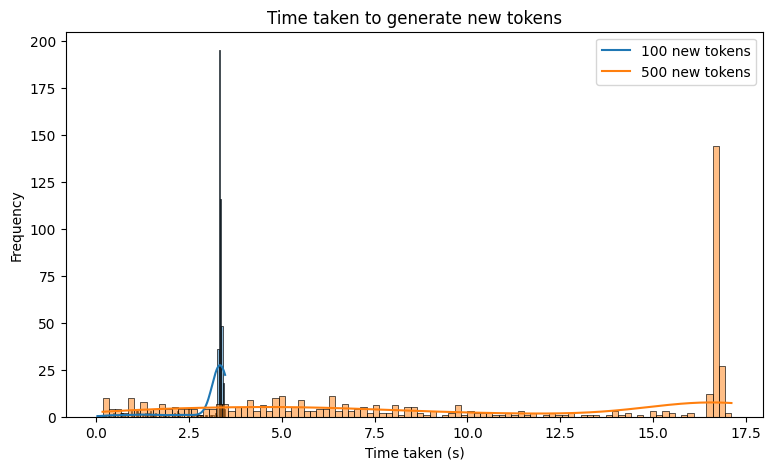

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

df_100 = df[df['max_new_tokens'] == 100]
df_500 = df[df['max_new_tokens'] == 500]

plt.figure(figsize=(9, 5))

sns.histplot(df_100, x='time_taken', bins=100, kde=True, legend=True)
sns.histplot(df_500, x='time_taken', bins=100, kde=True, legend=True)

plt.title('Time taken to generate new tokens')
plt.legend(['100 new tokens', '500 new tokens'])
plt.xlabel('Time taken (s)')
plt.ylabel('Frequency')
plt.show()

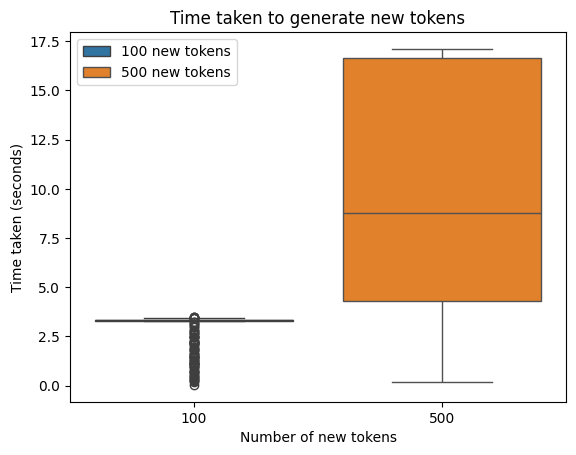

In [50]:
sns.boxplot(data=df_100, x='max_new_tokens', y='time_taken')
sns.boxplot(data=df_500, x='max_new_tokens', y='time_taken')

plt.title('Time taken to generate new tokens')
plt.legend(['100 new tokens', '500 new tokens'])
plt.xlabel('Number of new tokens')
plt.ylabel('Time taken (seconds)')

plt.show()

In [51]:
df_100.describe()

,max_new_tokens,time_taken
count,500.0,500.000000
mean,100.0,3.063598
std,0.0,0.722828
min,100.0,0.039047
25%,100.0,3.307970
50%,100.0,3.328626
75%,100.0,3.354555
max,100.0,3.477505


In [52]:
df_500.describe()

,max_new_tokens,time_taken
count,500.0,500.000000
mean,500.0,9.867301
std,0.0,6.103979
min,500.0,0.178975
25%,500.0,4.298852
50%,500.0,8.765057
75%,500.0,16.643501
max,500.0,17.107156


In [77]:
df_1_100 = pd.read_csv('datas/outputs_seconds_tst_1_100.csv', delimiter=',')
df_1_100['max_new_tokens'] = 100
df_1_100['batch_size'] = 1

df_4_100 = pd.read_csv('datas/outputs_seconds_tst_4_100.csv', delimiter=',')
df_4_100['max_new_tokens'] = 100
df_4_100['batch_size'] = 4

df_20 = pd.read_csv('datas/output_batch_size_20-2.csv', delimiter=',')
df_20['max_new_tokens'] = 100
df_20['batch_size'] = 20

df_40 = pd.read_csv('datas/output_batch_size_40-2.csv', delimiter=',')
df_40['max_new_tokens'] = 100
df_40['batch_size'] = 40

df_60 = pd.read_csv('datas/output_batch_size_60.csv', delimiter=',')
df_60['max_new_tokens'] = 100
df_60['batch_size'] = 60

df_80 = pd.read_csv('datas/output_batch_size_80-2.csv', delimiter=',')
df_80['max_new_tokens'] = 100
df_80['batch_size'] = 80

df_8_100 = pd.read_csv('datas/outputs_seconds_tst_8_100.csv', delimiter=',')
df_8_100['max_new_tokens'] = 100
df_8_100['batch_size'] = 8

df_1_500 = pd.read_csv('datas/outputs_seconds_tst_1_500.csv', delimiter=',')
df_1_500['max_new_tokens'] = 500
df_1_500['batch_size'] = 1

df_4_500 = pd.read_csv('datas/outputs_seconds_tst_4_500.csv', delimiter=',')
df_4_500['max_new_tokens'] = 500
df_4_500['batch_size'] = 4

df_8_500 = pd.read_csv('datas/outputs_seconds_tst_8_500.csv', delimiter=',')
df_8_500['max_new_tokens'] = 500
df_8_500['batch_size'] = 8

df = pd.concat([df_1_100, df_4_100, df_8_100, df_1_500, df_4_500, df_8_500, df_20, df_40, df_60, df_80])
df["group"] = df["batch_size"].astype(str) + " - " + df["max_new_tokens"].astype(str)
df.rename(columns={'0': 'inter_arrival_time', '1': 'job_time'}, inplace=True)
df['waiting_time'] = df['job_time'] - df['inter_arrival_time']
df

,inter_arrival_time,job_time,max_new_tokens,batch_size,2,3,group,waiting_time
0,0.420435,3.920761,100,1,NaN,NaN,1 - 100,3.500326
1,0.422358,7.186908,100,1,NaN,NaN,1 - 100,6.764551
2,0.523830,10.444776,100,1,NaN,NaN,1 - 100,9.920946
3,0.624363,13.711265,100,1,NaN,NaN,1 - 100,13.086902
4,0.625483,16.990471,100,1,NaN,NaN,1 - 100,16.364988
...,...,...,...,...,...,...,...,...
1624,335.661743,346.752923,100,80,29.0,20.0,80 - 100,11.091180
1625,335.862463,346.752924,100,80,29.0,20.0,80 - 100,10.890461
1626,335.962999,346.752925,100,80,29.0,20.0,80 - 100,10.789927
1627,336.063568,346.752927,100,80,29.0,20.0,80 - 100,10.689359


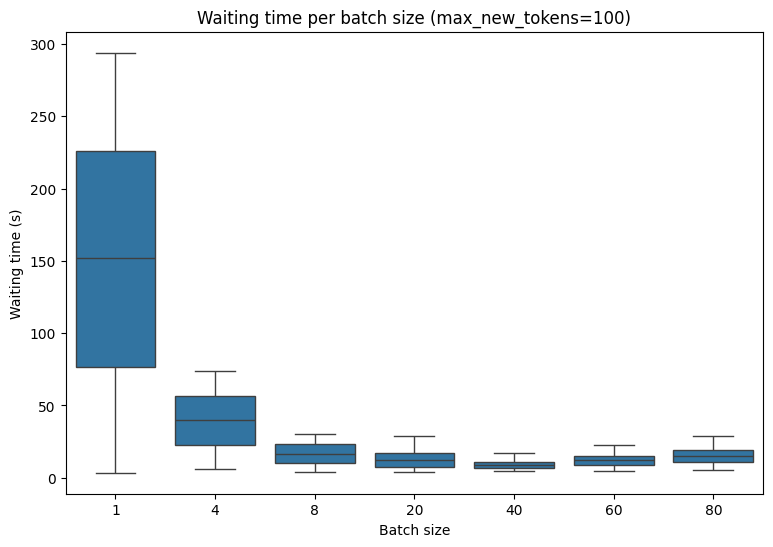

In [79]:
plt.figure(figsize=(9, 6))
sns.boxplot(df[df['max_new_tokens'] == 100], y='waiting_time', x='batch_size')
plt.title('Waiting time per batch size (max_new_tokens=100)')
plt.xlabel('Batch size')
plt.ylabel('Waiting time (s)')
plt.show()

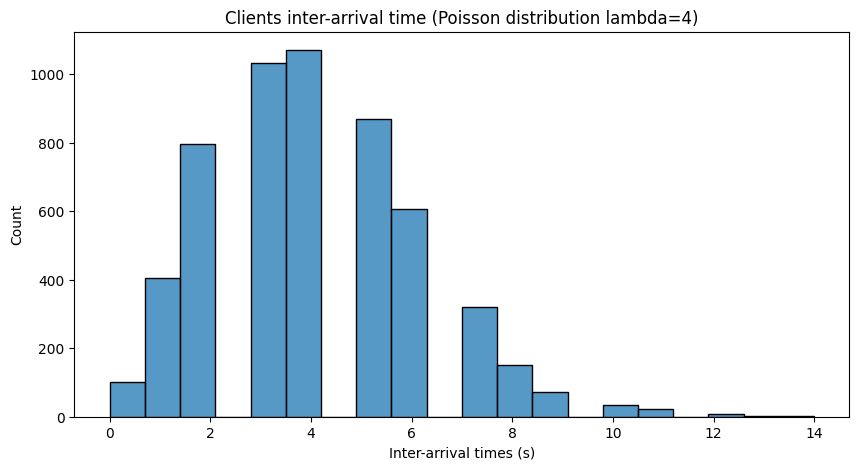

,inter_arrival_time,job_time,max_new_tokens,batch_size,2,3,group,waiting_time
0,0.420435,3.920761,100,1,NaN,NaN,1 - 100,3.500326
1,0.422358,7.186908,100,1,NaN,NaN,1 - 100,6.764551
2,0.523830,10.444776,100,1,NaN,NaN,1 - 100,9.920946
3,0.624363,13.711265,100,1,NaN,NaN,1 - 100,13.086902
4,0.625483,16.990471,100,1,NaN,NaN,1 - 100,16.364988
...,...,...,...,...,...,...,...,...
95,20.008881,308.438442,100,1,NaN,NaN,1 - 100,288.429561
96,20.209974,308.476880,100,1,NaN,NaN,1 - 100,288.266906
97,20.410558,311.705197,100,1,NaN,NaN,1 - 100,291.294638
98,20.611202,311.747279,100,1,NaN,NaN,1 - 100,291.136078


Arrival rate:	0.2476977248104009
Service rate:	0.3264135696161453
Utilization:	0.7588462854092971
Coefficient service:	0.23570485274089148
Coefficient arrival:	0.5053887277455946
M/M/1 queue:
E[T]	 12.70392260246724
E[Tq]	 9.640324477009475

G/G/1 queue:
E[Wq]	 1.4989477528617428


In [55]:
import numpy as np

np.random.seed(5)
l = 4
inter_arrival_time = np.random.poisson(l, df.shape[0])

plt.figure(figsize=(10, 5))

sns.histplot(
  inter_arrival_time,
  bins=20,
)
plt.title(f"Clients inter-arrival time (Poisson distribution lambda={l})")
plt.xlabel("Inter-arrival times (s)")
plt.ylabel("Count")

plt.show()

df_analysis = df[df['max_new_tokens'] == 100]
df_analysis = df_analysis[df_analysis['batch_size'] == 1]
display(df_analysis)

mean_arrival_time = np.mean(inter_arrival_time)
mean_service_time = tau = np.mean(df_100['time_taken'])

service_rate = mu = 1 / tau
arrival_rate = lamda = 1 / mean_arrival_time
utilization = rho = lamda / mu
print(f"Arrival rate:\t{lamda}")
print(f"Service rate:\t{mu}")
print(f"Utilization:\t{rho}")

if lamda >= mu:
    raise ValueError("The system is unstable (λ >= μ).")

c_service = np.std(df_100['time_taken']) / mean_service_time
c_arrival = np.std(inter_arrival_time) / mean_arrival_time
print(f"Coefficient service:\t{c_service}")
print(f"Coefficient arrival:\t{c_arrival}")

# For M/M/1 system, using provided formulae
expected_T = 1 / (mu - lamda)
expected_Tq = rho * expected_T

# For G/G/1
expected_Wq = (rho / (1 - rho)) * ((c_arrival ** 2 + c_service ** 2)/2) * tau

print("M/M/1 queue:")
print(f"E[T]\t {expected_T}")
print(f"E[Tq]\t {expected_Tq}")
print("\nG/G/1 queue:")
print(f"E[Wq]\t {expected_Wq}")

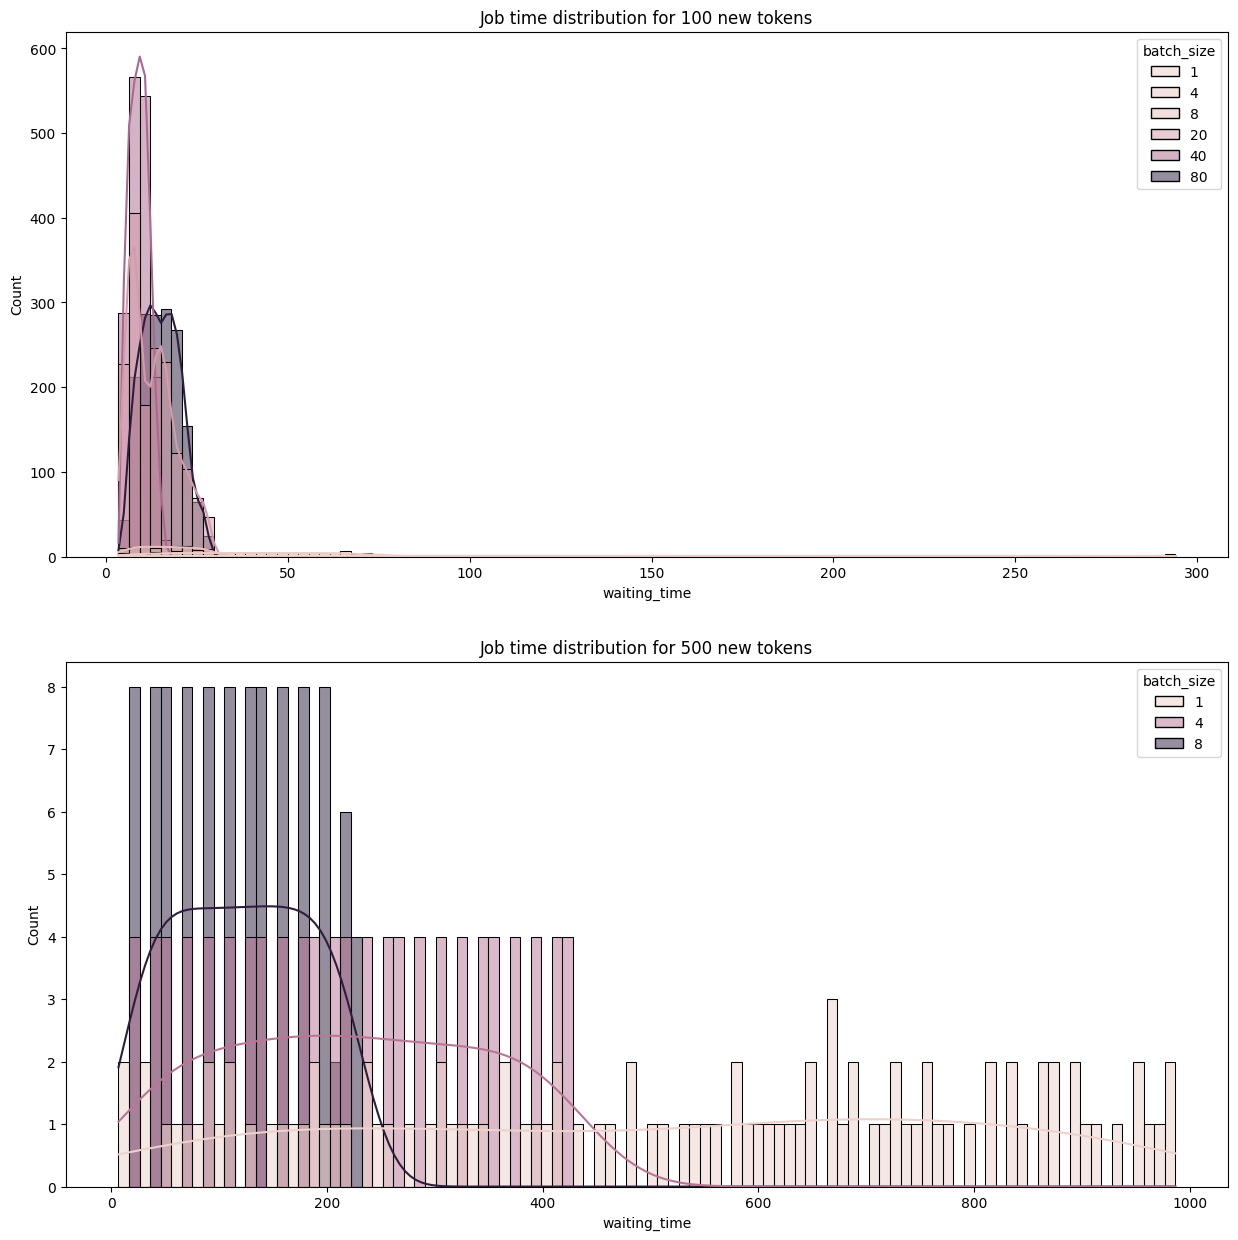

In [56]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
sns.histplot(df[df['max_new_tokens'] == 100], x='waiting_time', bins=100, kde=True, legend=True, hue='batch_size', ax=axs[0])
sns.histplot(df[df['max_new_tokens'] == 500], x='waiting_time', bins=100, kde=True, legend=True, hue='batch_size', ax=axs[1])
axs[0].set_title('Job time distribution for 100 new tokens')
axs[1].set_title('Job time distribution for 500 new tokens')
plt.show()

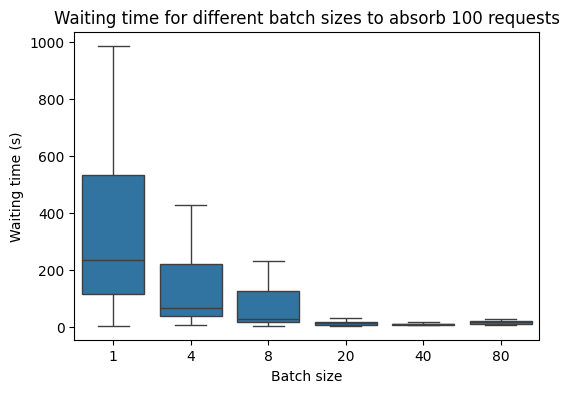

In [57]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='batch_size', y='waiting_time')
plt.xlabel('Batch size')
plt.ylabel('Waiting time (s)')
plt.title('Waiting time for different batch sizes to absorb 100 requests')
plt.show()

In [58]:
df[df['batch_size'] == 1].describe()

,inter_arrival_time,job_time,max_new_tokens,batch_size,2,3,waiting_time
count,200.000000,200.000000,200.000000,200.0,0.0,0.0,200.000000
mean,10.483636,339.787097,300.000000,1.0,NaN,NaN,329.303461
std,6.189409,282.648924,200.501883,0.0,NaN,NaN,278.432141
min,0.420023,3.920761,100.000000,1.0,NaN,NaN,3.500326
25%,5.096305,120.966674,100.000000,1.0,NaN,NaN,113.546445
50%,10.569354,244.985027,300.000000,1.0,NaN,NaN,232.900789
75%,15.716724,541.296138,500.000000,1.0,NaN,NaN,530.777230
max,21.012425,1007.306454,500.000000,1.0,NaN,NaN,986.294029


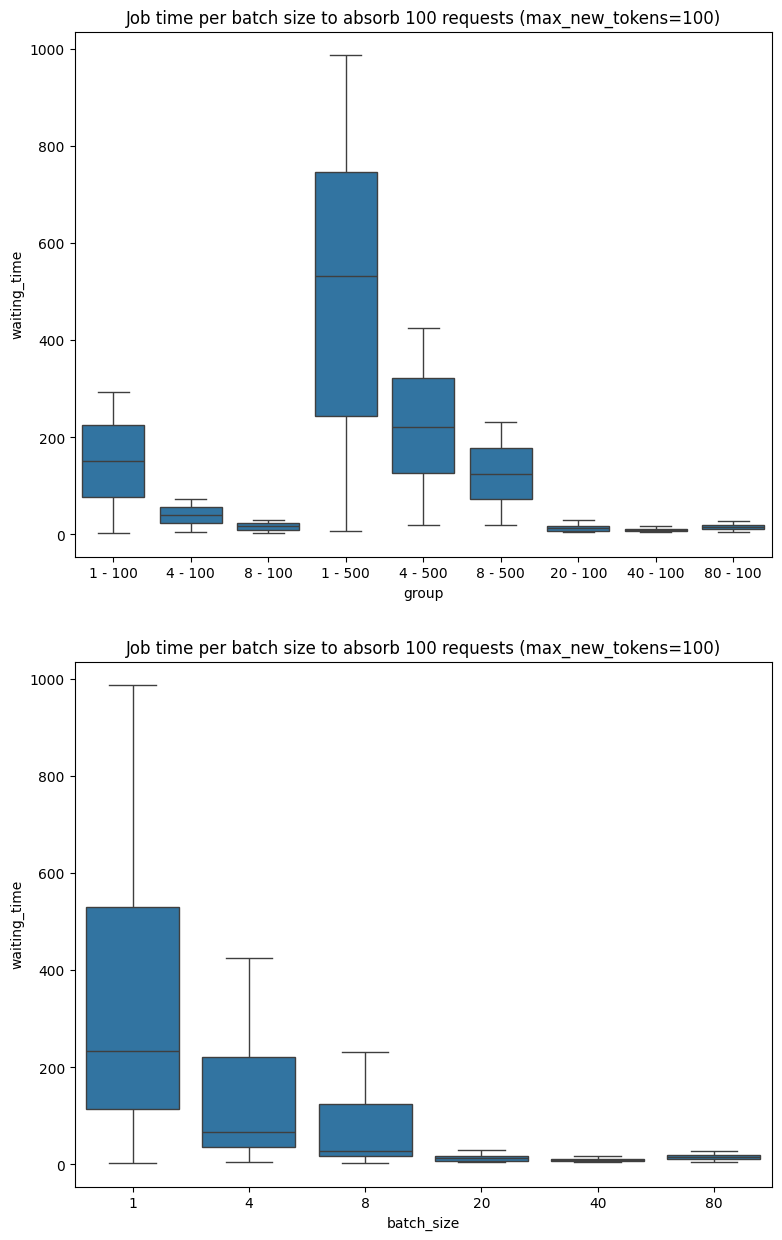

In [59]:
fig, axs = plt.subplots(2, 1, figsize=(9, 15))
sns.boxplot(data=df, x='group', y='waiting_time', ax=axs[0])
sns.boxplot(data=df, x='batch_size', y='waiting_time', ax=axs[1])
axs[0].set_title('Job time per batch size to absorb 100 requests (max_new_tokens=100)')
axs[1].set_title('Job time per batch size to absorb 100 requests (max_new_tokens=100)')
plt.show()

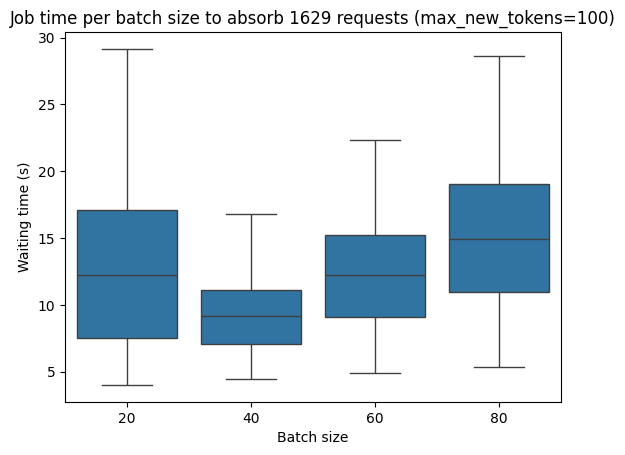

In [80]:
sns.boxplot(data=df[
    (df['batch_size'] == 20) | (df['batch_size'] == 40) |  (df['batch_size'] == 60) | (df['batch_size'] == 80)
], x='batch_size', y='waiting_time')
plt.title('Job time per batch size to absorb 1629 requests (max_new_tokens=100)')
plt.xlabel('Batch size')
plt.ylabel('Waiting time (s)')
plt.show()

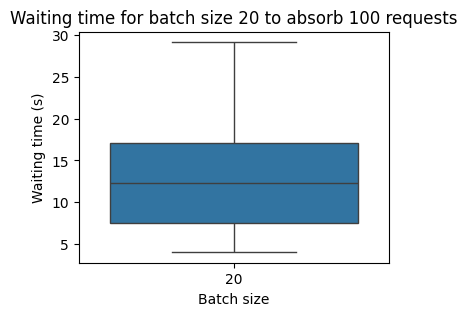

In [61]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df[
    (df['batch_size'] == 20)
], x='batch_size', y='waiting_time')
plt.title('Waiting time for batch size 20 to absorb 100 requests')
plt.ylabel('Waiting time (s)')
plt.xlabel('Batch size')
plt.show()

In [62]:
import numpy as np
import math

df = pd.DataFrame()
for percentile in np.arange(0.0, 0.4 + 0.1, 0.1, dtype=float):
    df_temp = pd.read_csv(f'datas/output_time_{percentile:.1f}.csv', delimiter=',')
    df_temp['buffer_time'] = math.ceil(percentile * 1000)
    df = pd.concat([df, df_temp])

df.rename(columns={'0': 'inter_arrival_time', '1': 'job_time', '2': 'batch_size', '3': 'group'}, inplace=True)
df['max_new_tokens'] = 100
df['waiting_time'] = df['job_time'] - df['inter_arrival_time']
df

,inter_arrival_time,job_time,batch_size,group,buffer_time,max_new_tokens,waiting_time
0,0.203204,3.588784,1,0,0,100,3.385580
1,0.604921,7.608220,19,1,0,100,7.003299
2,0.706339,7.608230,19,1,0,100,6.901891
3,0.707338,7.608232,19,1,0,100,6.900894
4,0.907818,7.608233,19,1,0,100,6.700416
...,...,...,...,...,...,...,...
95,19.779787,25.620847,19,5,400,100,5.841060
96,20.080923,25.620848,19,5,400,100,5.539925
97,20.381391,25.620849,19,5,400,100,5.239458
98,20.481885,25.620850,19,5,400,100,5.138965


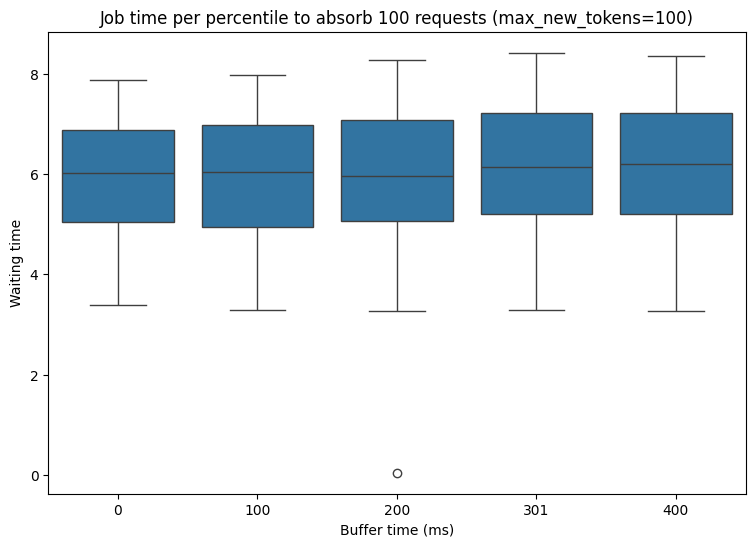

In [63]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x='buffer_time', y='waiting_time')
plt.title('Job time per percentile to absorb 100 requests (max_new_tokens=100)')
# rename axes
plt.xlabel('Buffer time (ms)')
plt.ylabel('Waiting time')
plt.show()

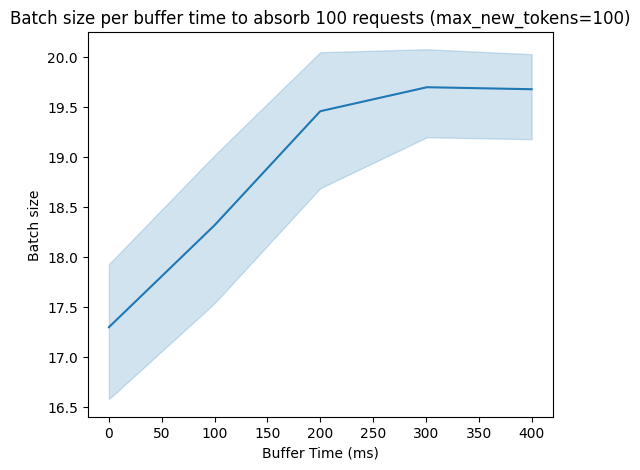

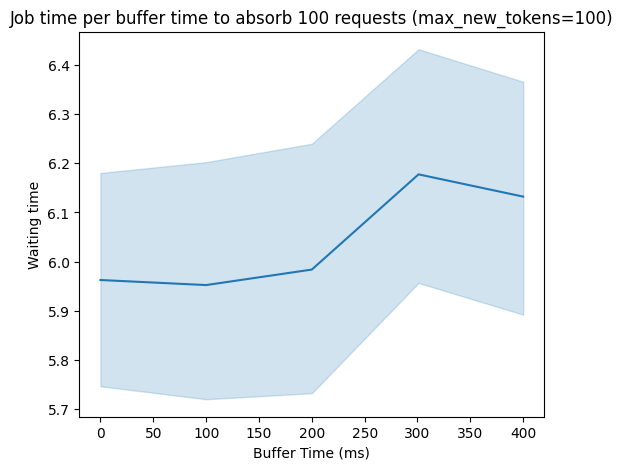

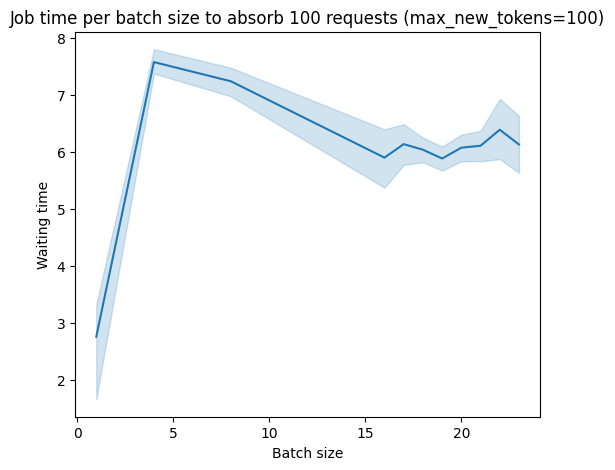

In [64]:
plt.figure(figsize=(6, 5))
sns.lineplot(data=df, x='buffer_time', y='batch_size')
plt.xlabel('Buffer Time (ms)')
plt.ylabel('Batch size')
plt.title('Batch size per buffer time to absorb 100 requests (max_new_tokens=100)')
plt.show()

plt.figure(figsize=(6, 5))
sns.lineplot(data=df, x='buffer_time', y='waiting_time')
plt.xlabel('Buffer Time (ms)')
plt.ylabel('Waiting time')
plt.title('Job time per buffer time to absorb 100 requests (max_new_tokens=100)')
plt.show()

plt.figure(figsize=(6, 5))
sns.lineplot(data=df, x='batch_size', y='waiting_time')
plt.xlabel('Batch size')
plt.ylabel('Waiting time')
plt.title('Job time per batch size to absorb 100 requests (max_new_tokens=100)')
plt.show()

In [65]:
import numpy as np
import math

df = pd.DataFrame()
for percentile in np.arange(0.1, 1.0 + 0.1, 0.1, dtype=float):
    df_temp = pd.read_csv(f'datas/output_adaptative_batch_size_{percentile:.1f}-2.csv', delimiter=',')
    df_temp['percentile'] = math.ceil(percentile * 100)
    df = pd.concat([df, df_temp])

df.rename(columns={'0': 'inter_arrival_time', '1': 'job_time', '2': 'batch_size', '3': 'group'}, inplace=True)
df['max_new_tokens'] = 100
df['waiting_time'] = df['job_time'] - df['inter_arrival_time']
df

,inter_arrival_time,job_time,batch_size,group,percentile,max_new_tokens,waiting_time
0,0.205345,3.075137,1,0,10,100,2.869792
1,0.606380,7.107891,15,1,10,100,6.501511
2,0.707444,7.107899,15,1,10,100,6.400454
3,0.707838,7.107901,15,1,10,100,6.400063
4,0.909361,7.107902,15,1,10,100,6.198542
...,...,...,...,...,...,...,...
95,19.784863,25.699105,19,5,100,100,5.914243
96,20.086193,25.699107,19,5,100,100,5.612914
97,20.387870,25.699108,19,5,100,100,5.311238
98,20.489354,25.699109,19,5,100,100,5.209755


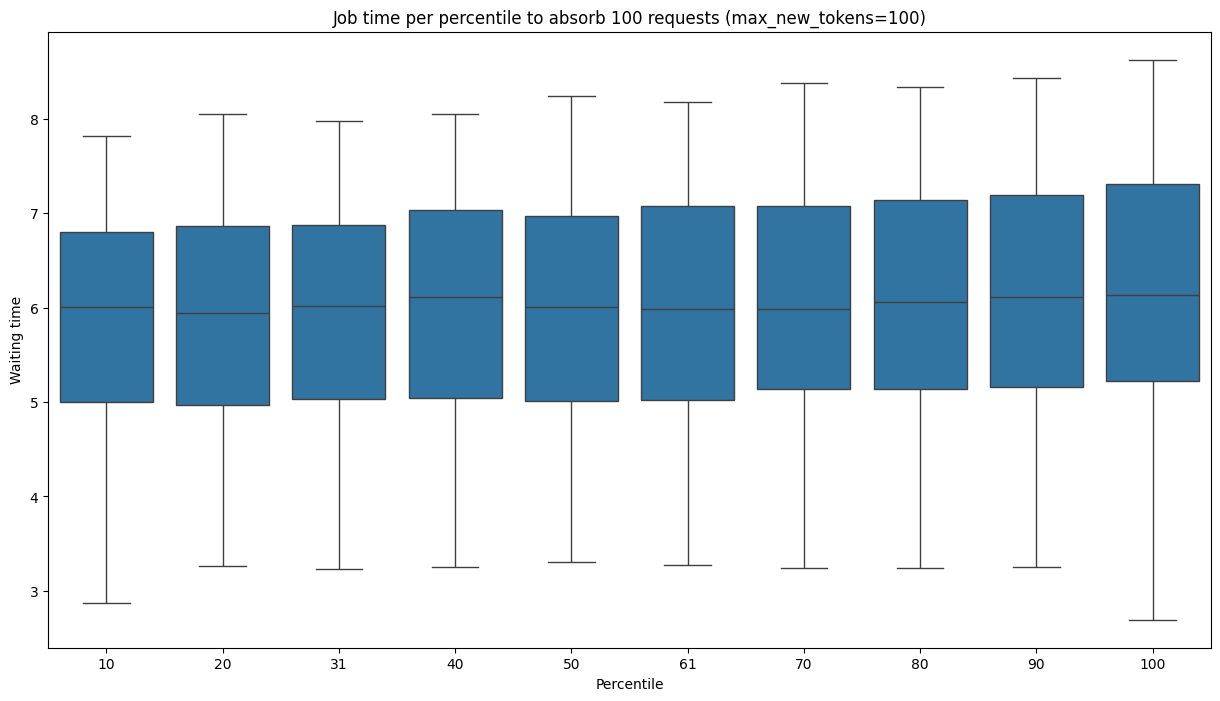

In [66]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='percentile', y='waiting_time')
plt.title('Job time per percentile to absorb 100 requests (max_new_tokens=100)')
# rename axes
plt.xlabel('Percentile')
plt.ylabel('Waiting time')
plt.show()

In [67]:
# n = df['percentile'].nunique()
# fig, axs = plt.subplots(df['percentile'].nunique(), 1, figsize=(15, n * 8))

# for i, percentile in enumerate(df['percentile'].unique()):
#     sns.histplot(df[df['percentile'] == percentile], x='waiting_time', bins=100, kde=True, legend=True, ax=axs[i])
#     axs[i].set_title(f'Job time distribution for 100 new tokens (percentile={percentile})')

# plt.show()

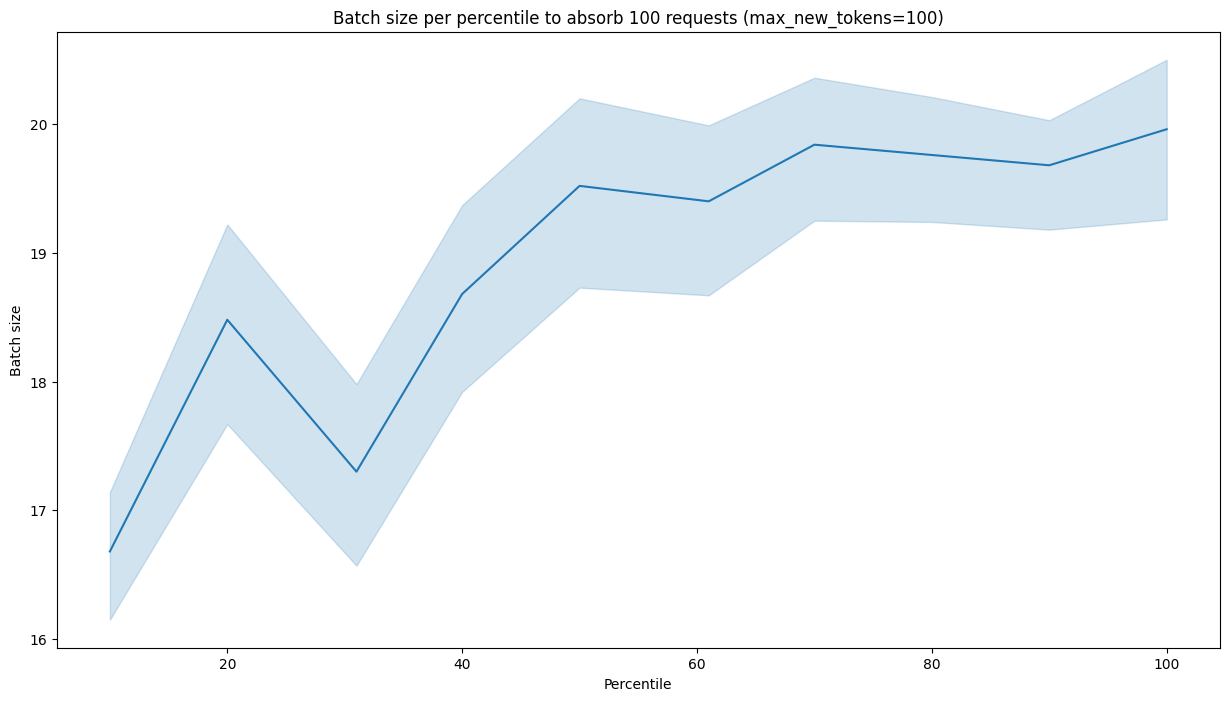

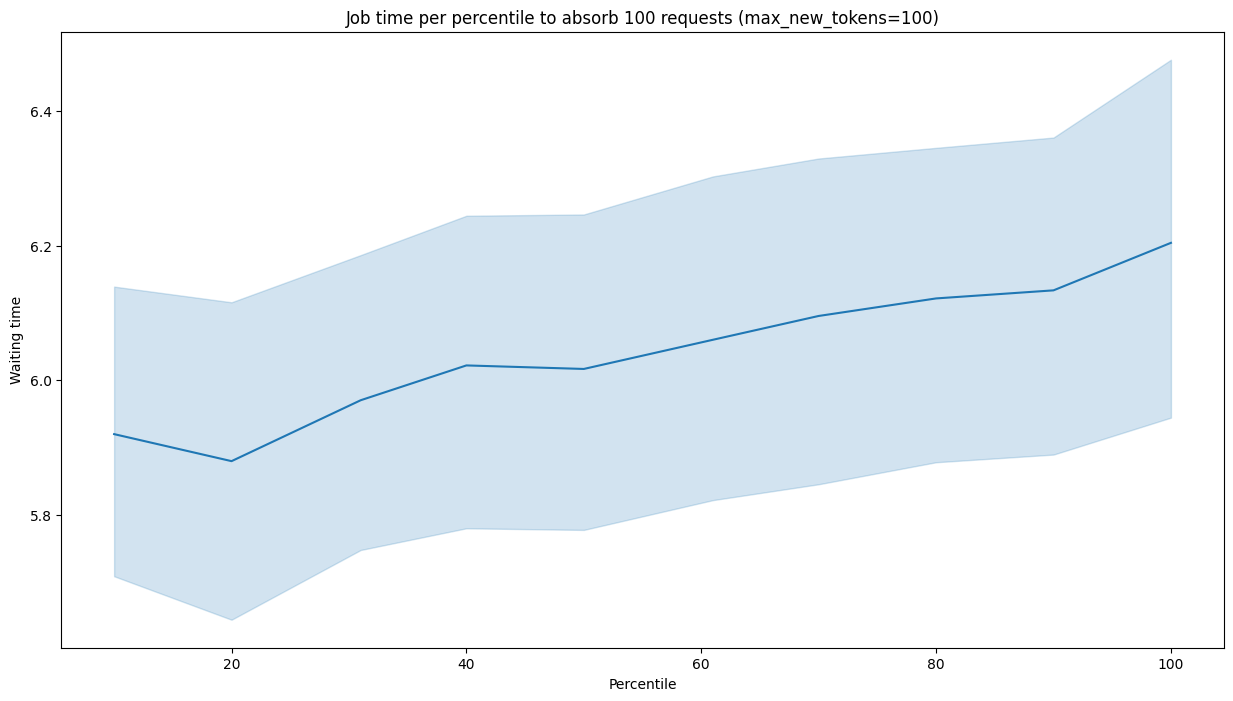

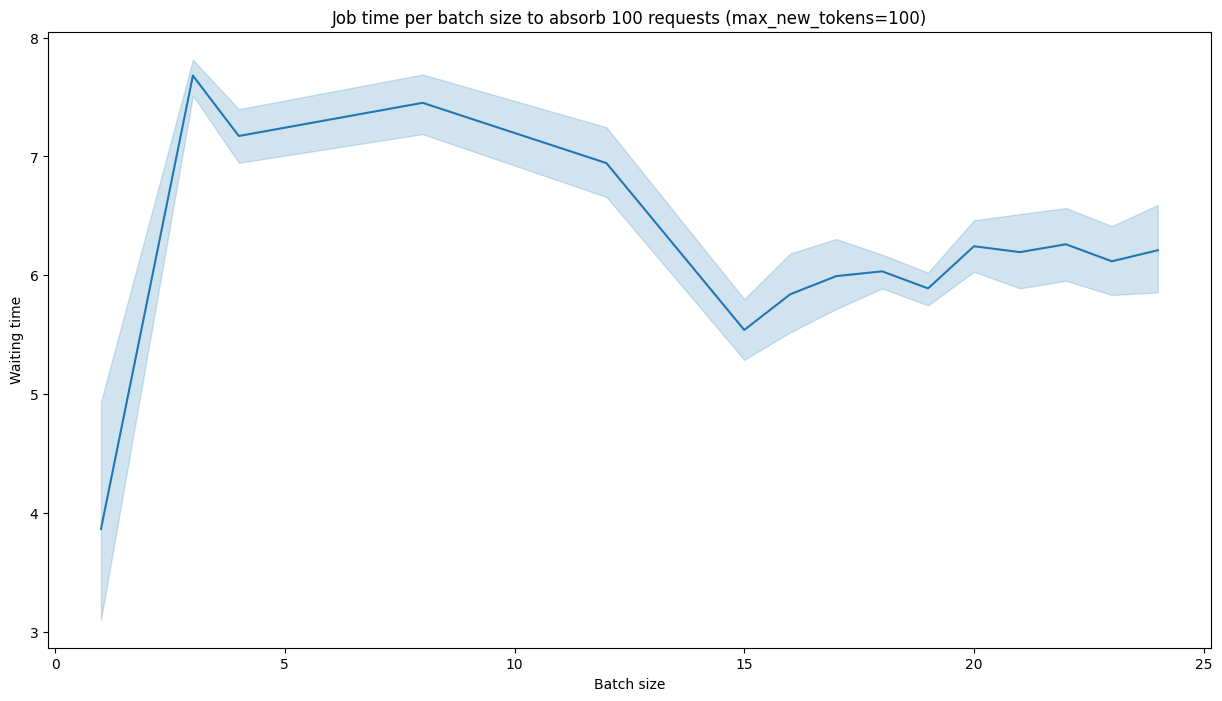

In [68]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='percentile', y='batch_size')
plt.xlabel('Percentile')
plt.ylabel('Batch size')
plt.title('Batch size per percentile to absorb 100 requests (max_new_tokens=100)')
plt.show()

plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='percentile', y='waiting_time')
plt.xlabel('Percentile')
plt.ylabel('Waiting time')
plt.title('Job time per percentile to absorb 100 requests (max_new_tokens=100)')
plt.show()

plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='batch_size', y='waiting_time')
plt.xlabel('Batch size')
plt.ylabel('Waiting time')
plt.title('Job time per batch size to absorb 100 requests (max_new_tokens=100)')
plt.show()

In [69]:
import numpy as np
import math

df = pd.DataFrame()
for percentile in np.arange(1, 5 + 0.1, 1, dtype=float):
    df_temp = pd.read_csv(f'datas/output_batch_size_times_{percentile:.1f}.csv', delimiter=',')
    df_temp['factor'] = int(percentile)
    df = pd.concat([df, df_temp])

df.rename(columns={'0': 'inter_arrival_time', '1': 'job_time', '2': 'batch_size', '3': 'group'}, inplace=True)
df['max_new_tokens'] = 100
df['waiting_time'] = df['job_time'] - df['inter_arrival_time']
df

,inter_arrival_time,job_time,batch_size,group,factor,max_new_tokens,waiting_time
0,0.203018,3.539939,1,0,1,100,3.336921
1,0.603965,7.678296,19,1,1,100,7.074331
2,0.704893,7.678303,19,1,1,100,6.973410
3,0.705450,7.678306,19,1,1,100,6.972856
4,0.906856,7.678307,19,1,1,100,6.771451
...,...,...,...,...,...,...,...
95,19.831348,28.598473,8,5,5,100,8.767125
96,20.132813,28.598474,8,5,5,100,8.465661
97,20.434246,28.598475,8,5,5,100,8.164230
98,20.534789,28.598477,8,5,5,100,8.063688


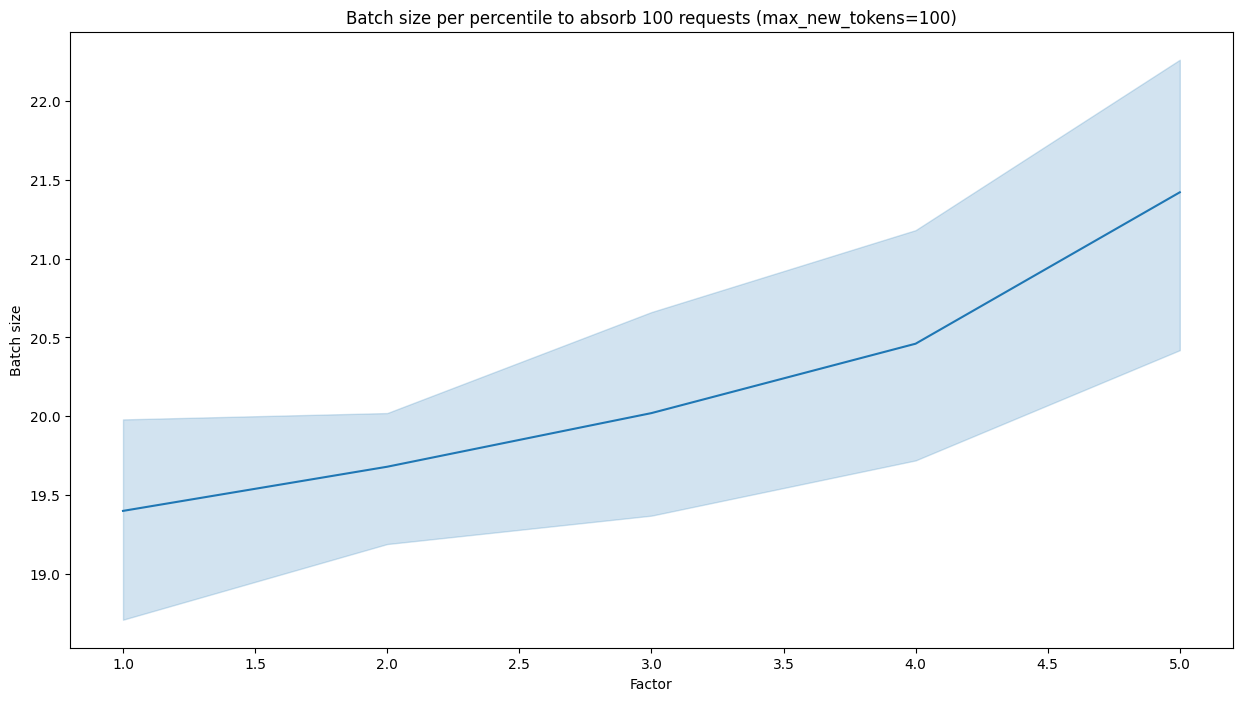

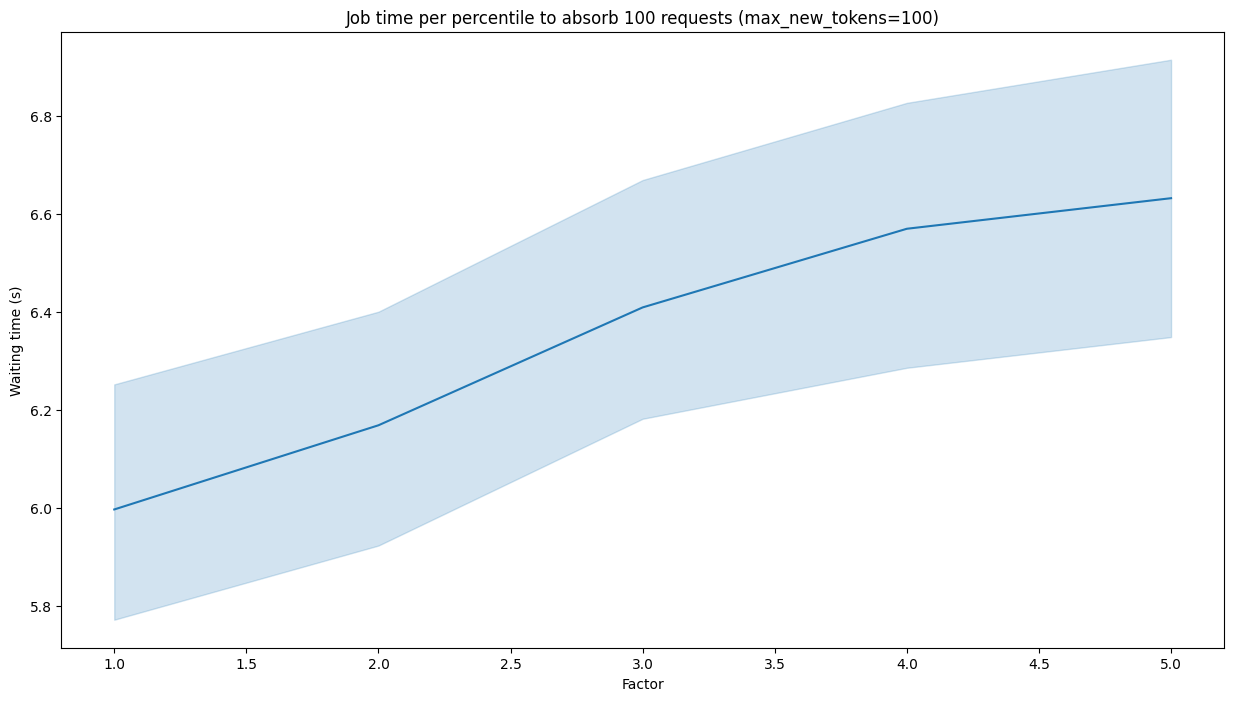

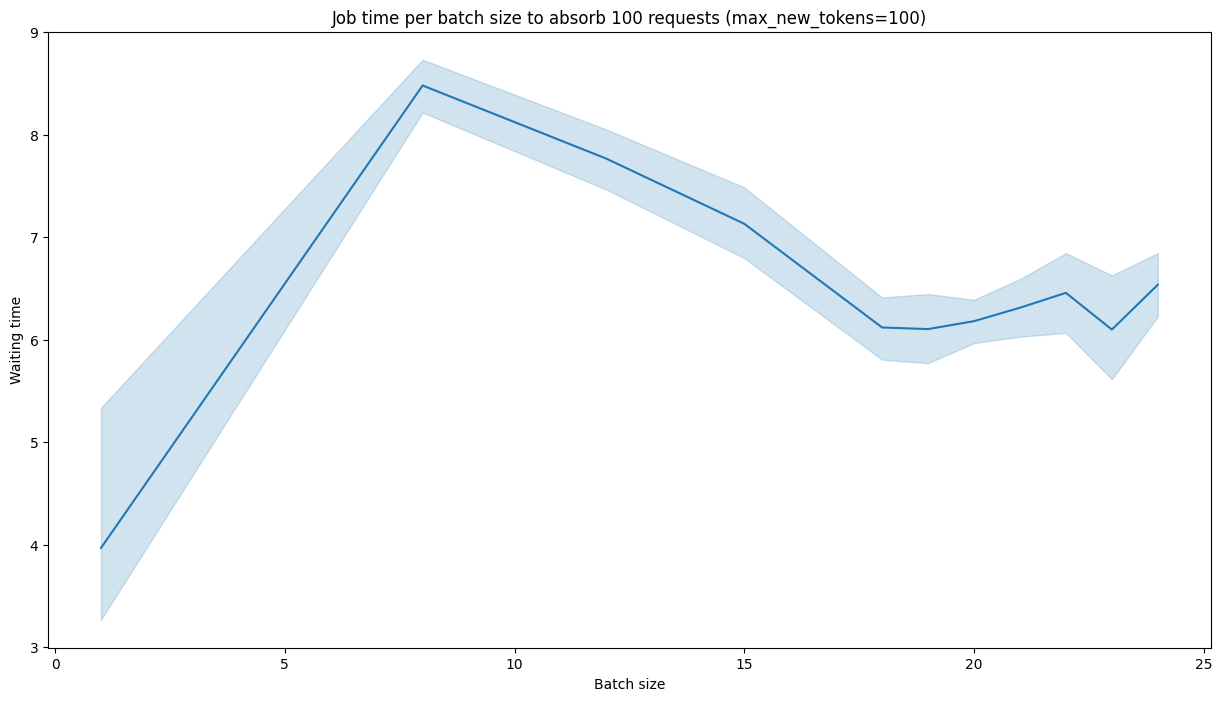

In [70]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='factor', y='batch_size')
plt.xlabel('Factor')
plt.ylabel('Batch size')
plt.title('Batch size per percentile to absorb 100 requests (max_new_tokens=100)')
plt.show()

plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='factor', y='waiting_time')
plt.xlabel('Factor')
plt.ylabel('Waiting time (s)')
plt.title('Job time per percentile to absorb 100 requests (max_new_tokens=100)')
plt.show()

plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='batch_size', y='waiting_time')
plt.xlabel('Batch size')
plt.ylabel('Waiting time')
plt.title('Job time per batch size to absorb 100 requests (max_new_tokens=100)')
plt.show()

In [71]:
df = pd.read_csv('datas/random_times.csv', index_col=0)
df.columns = ['delay', 'batch_size', 'waiting_time', 'group']
df

,delay,batch_size,waiting_time,group
0,0,1,3.385162,0
1,0,19,7.085796,1
2,0,19,6.985084,1
3,0,19,6.984729,1
4,0,19,6.783967,1
...,...,...,...,...
295,1,9,7.827164,12
296,1,9,7.426296,12
297,1,9,7.325698,12
298,1,9,7.225086,12


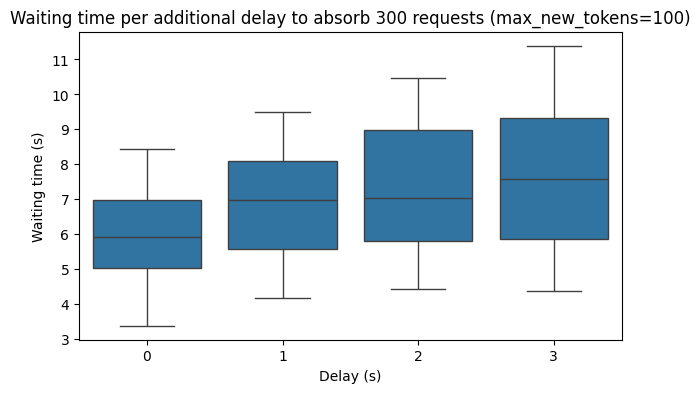

In [72]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='delay', y='waiting_time')
plt.title('Waiting time per additional delay to absorb 300 requests (max_new_tokens=100)')
# rename axes
plt.xlabel('Delay (s)')
plt.ylabel('Waiting time (s)')
plt.show()

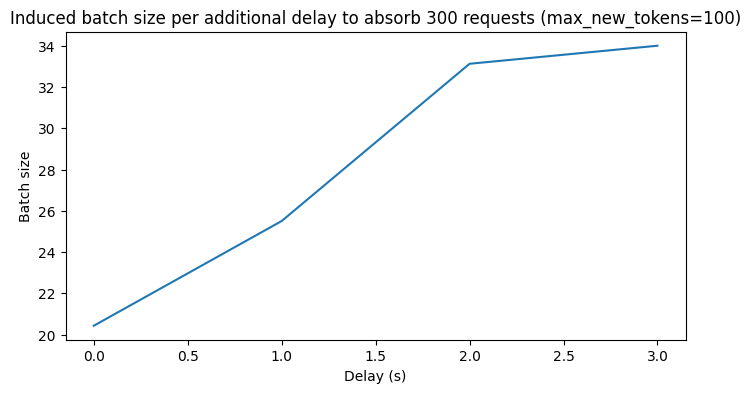

In [73]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df.groupby('delay').mean().reset_index(), x='delay', y='batch_size')
plt.title('Induced batch size per additional delay to absorb 300 requests (max_new_tokens=100)')
# rename axes
plt.xlabel('Delay (s)')
plt.ylabel('Batch size')
plt.show()

In [74]:
import numpy as np
import math

df = pd.DataFrame()
for percentile in [0, 1, 2, 3, 4, 5]:
    df_temp = pd.read_csv(f'datas/delay_{percentile}.csv', delimiter=',')
    df_temp['factor'] = int(percentile)
    df = pd.concat([df, df_temp])

df.rename(columns={'0': 'inter_arrival_time', '1': 'job_time', '2': 'batch_size', '3': 'group'}, inplace=True)
df['max_new_tokens'] = 100
df['waiting_time'] = df['job_time'] - df['inter_arrival_time']
df

,inter_arrival_time,job_time,batch_size,group,factor,max_new_tokens,waiting_time
0,0.205842,6.173731,1,0,0,100,5.967890
1,0.607178,10.659121,30,1,0,100,10.051943
2,0.707746,10.659129,30,1,0,100,9.951383
3,0.708645,10.659132,30,1,0,100,9.950487
4,0.909160,10.659134,30,1,0,100,9.749974
...,...,...,...,...,...,...,...
1624,335.345084,348.667923,41,32,5,100,13.322839
1625,335.545767,348.667925,41,32,5,100,13.122158
1626,335.646255,348.667926,41,32,5,100,13.021671
1627,335.746804,348.667928,41,32,5,100,12.921124


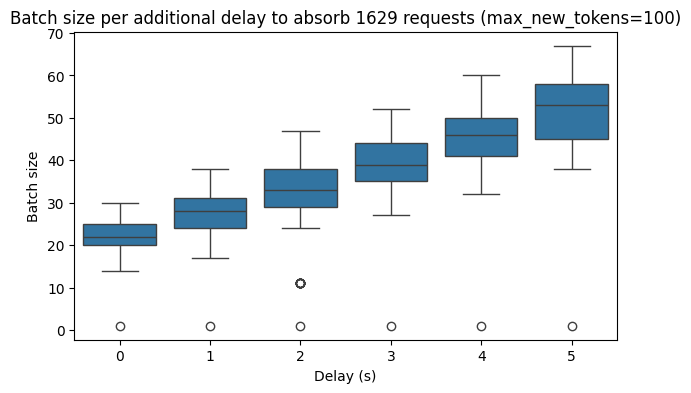

In [75]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='factor', y='batch_size')
plt.title('Batch size per additional delay to absorb 1629 requests (max_new_tokens=100)')
# rename axes
plt.xlabel('Delay (s)')
plt.ylabel('Batch size')
plt.show()

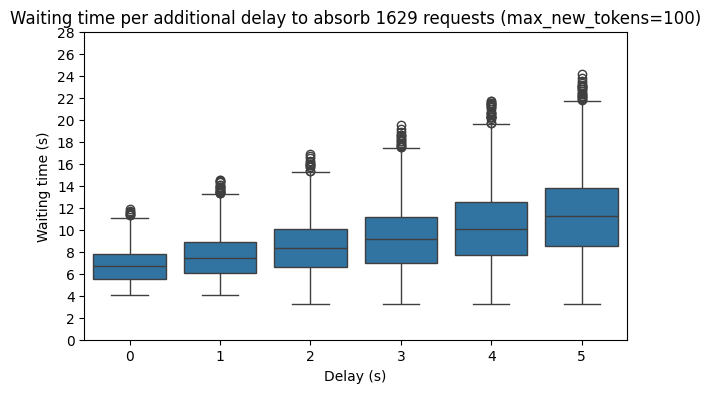

In [76]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='factor', y='waiting_time')
plt.title('Waiting time per additional delay to absorb 1629 requests (max_new_tokens=100)')
# rename axes
plt.yticks(np.arange(0, 30, 2))
plt.xlabel('Delay (s)')
plt.ylabel('Waiting time (s)')
plt.show()